In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# delete the NaN columns
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [5]:
df.shape

(5572, 2)

In [6]:
# delete duplicated records
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(5169, 2)

In [8]:
df.isna().sum()

v1    0
v2    0
dtype: int64

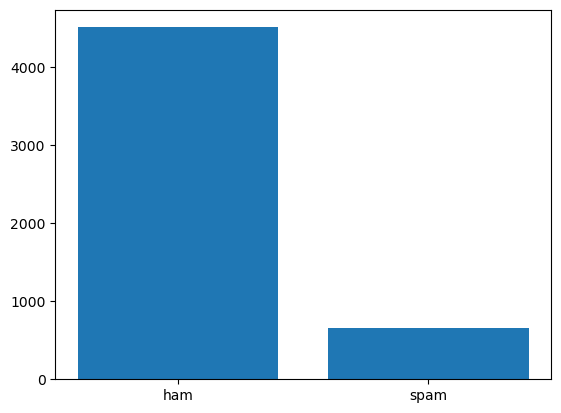

In [9]:
# show the distribution of target column
value_counts = df['v1'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.show()

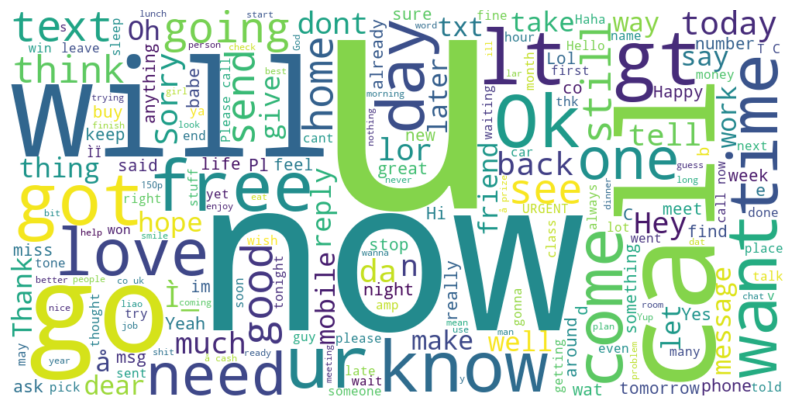

In [10]:
# used for create word cloud visualizations.
from wordcloud import WordCloud

# joins all the v2 values into a single string with spaces in between
text=' '.join(df['v2']) 

# creating the word cloud
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(text)

# setting up the plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [11]:
# making all the values in v2 column lower case
df['v2'] = df['v2'].str.lower()
df['v2']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: v2, Length: 5169, dtype: object

In [12]:
import re                                  # regular expressions
from nltk.corpus import stopwords          # for removing stopwords
from nltk.tokenize import word_tokenize    # for tokenizing text


def text_preprocessing(text):
    
    # remove punctations & numbers and anything not in
    # between a-z and A-Z and replace them with a space.
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # tokenizes the cleaned text into individual words
    cleaned_text = word_tokenize(text)
    
    # remove stopwords like ("the", "and", "is", etc).
    stop_words = set(stopwords.words("english"))
    words = [word for word in cleaned_text if word not in stop_words]
    
    return cleaned_text

# applies the text_preprocessing function to each row in the 'v2' column
# and creates a new column 'txt' that contains the preprocessed text data.
df['txt'] = df['v2'].apply(text_preprocessing)
df.head(10)

,v1,v2,txt
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, don, t, think, he, goes, to, usf, he,..."
5,spam,freemsg hey there darling it's been 3 week's n...,"[freemsg, hey, there, darling, it, s, been, we..."
6,ham,even my brother is not like to speak with me. ...,"[even, my, brother, is, not, like, to, speak, ..."
7,ham,as per your request 'melle melle (oru minnamin...,"[as, per, your, request, melle, melle, oru, mi..."
8,spam,winner!! as a valued network customer you have...,"[winner, as, a, valued, network, customer, you..."
9,spam,had your mobile 11 months or more? u r entitle...,"[had, your, mobile, months, or, more, u, r, en..."


In [13]:
# delete the v2 column from our dataset
df.drop('v2',axis=1,inplace=True)

In [14]:
# in v1 column replace the value ham with 0 and the value spam with 1
df['v1'] = df['v1'].str.replace('ham','0').str.replace('spam','1').astype(int)

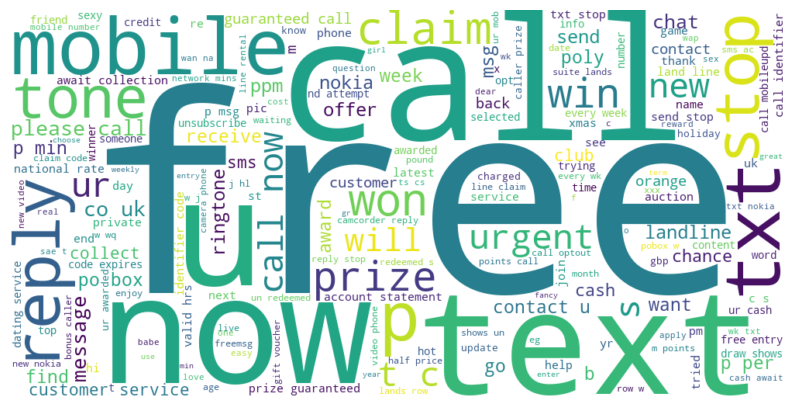

In [15]:
# only takes the spam text
df_1 = df[df['v1'] == 1]

# Join the lists of tokens into a single string
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']])  

# creating the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

# setting up the plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

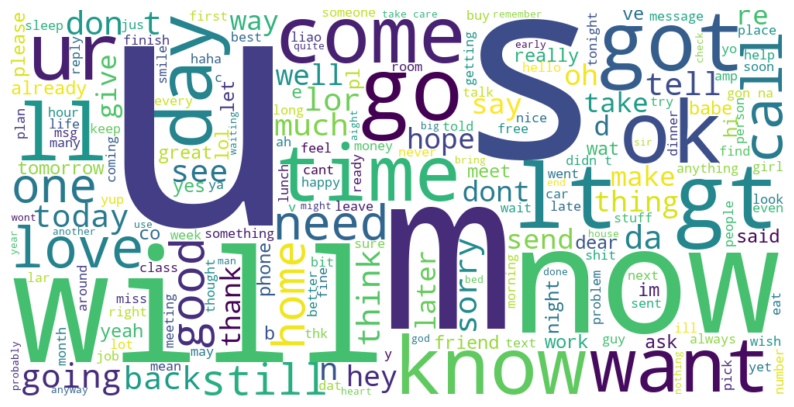

In [16]:
# only takes the ham text
df_1 = df[df['v1'] == 0]

# Join the lists of tokens into a single string
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']]) 

# creating the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

# setting up the plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
# used for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# create an object from CountVectorizer class
countvector = CountVectorizer()

# preparing the input data
sentence_as_x = [' '.join(tokens) for tokens in df['txt']]

# converts sentence_as_x into a sparse matrix where each row represents
# a document and each column represents a unique token (word).
X = countvector.fit_transform(sentence_as_x)

In [18]:
from sklearn.model_selection import train_test_split

# the label column
y = df['v1']

# split our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# covert train and test into array
X_train = X_train.toarray()
X_test = X_test.toarray()

# MODELLING

In [19]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# GaussianNb
gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train)

# MultinomialNB
multiNB = MultinomialNB()
multiNB.fit(X_train, y_train)

# BernoulliNB
BerNB = BernoulliNB()
BerNB.fit(X_train, y_train)

BernoulliNB()

In [20]:
gaussNBPre = gaussNB.predict(X_test)
multiNBPre = multiNB.predict(X_test)
BerNBPre = BerNB.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

print("From Gaussian model", accuracy_score(y_test, gaussNBPre))
print("From Multinomial model", accuracy_score(y_test, multiNBPre))
print("From Bernoulli model", accuracy_score(y_test, BerNBPre))

From Gaussian model 0.8916827852998066
From Multinomial model 0.9787234042553191
From Bernoulli model 0.97678916827853
